In [69]:
import os
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})
plt.rcParams['image.cmap'] = 'gray' # grayscale looks better

from IPython.display import Image, display, SVG, clear_output, HTML
from keras.datasets import mnist

In [70]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [71]:
# 
def draw_grid(G, ax=None):
    pos = dict(zip(G,G))

    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    else:
        fig = None
    
    node_color = []
    node_label = {}
    for n, node in enumerate(G):
        # pass
        # node_color.append(G.nodes[k].get('color', 'green'))
        node_color.append(G.nodes[node]["weight"])
        # node_color[n] = G.nodes[n].get('weight')
        # node_label[n] = G.nodes[n].get('label', n)

    edge_color = []
    edge_width = []
    for e in G.edges():
        edge_color.append(G.edges[e].get('color', 'blue'))
        edge_width.append(G.edges[e].get('width', 1))

    nx.draw_networkx_edges(G, pos=pos, edge_color=edge_color, alpha=0.50, ax=ax, width=edge_width)
    nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, alpha=0.75, ax=ax, node_shape='s', node_size=100)
    fig.tight_layout()
    ax.axis('off')
    ax.autoscale()

In [72]:
import torch_geometric.data
import torch_geometric.utils 

In [73]:
edge_index, x = torch_geometric.utils.grid(4, 4)
data = torch_geometric.data.Data(x=x, edge_index=edge_index)
G = torch_geometric.utils.to_networkx(data, to_undirected=True, remove_self_loops=True)
# nx.draw(G)
# draw_grid(G)

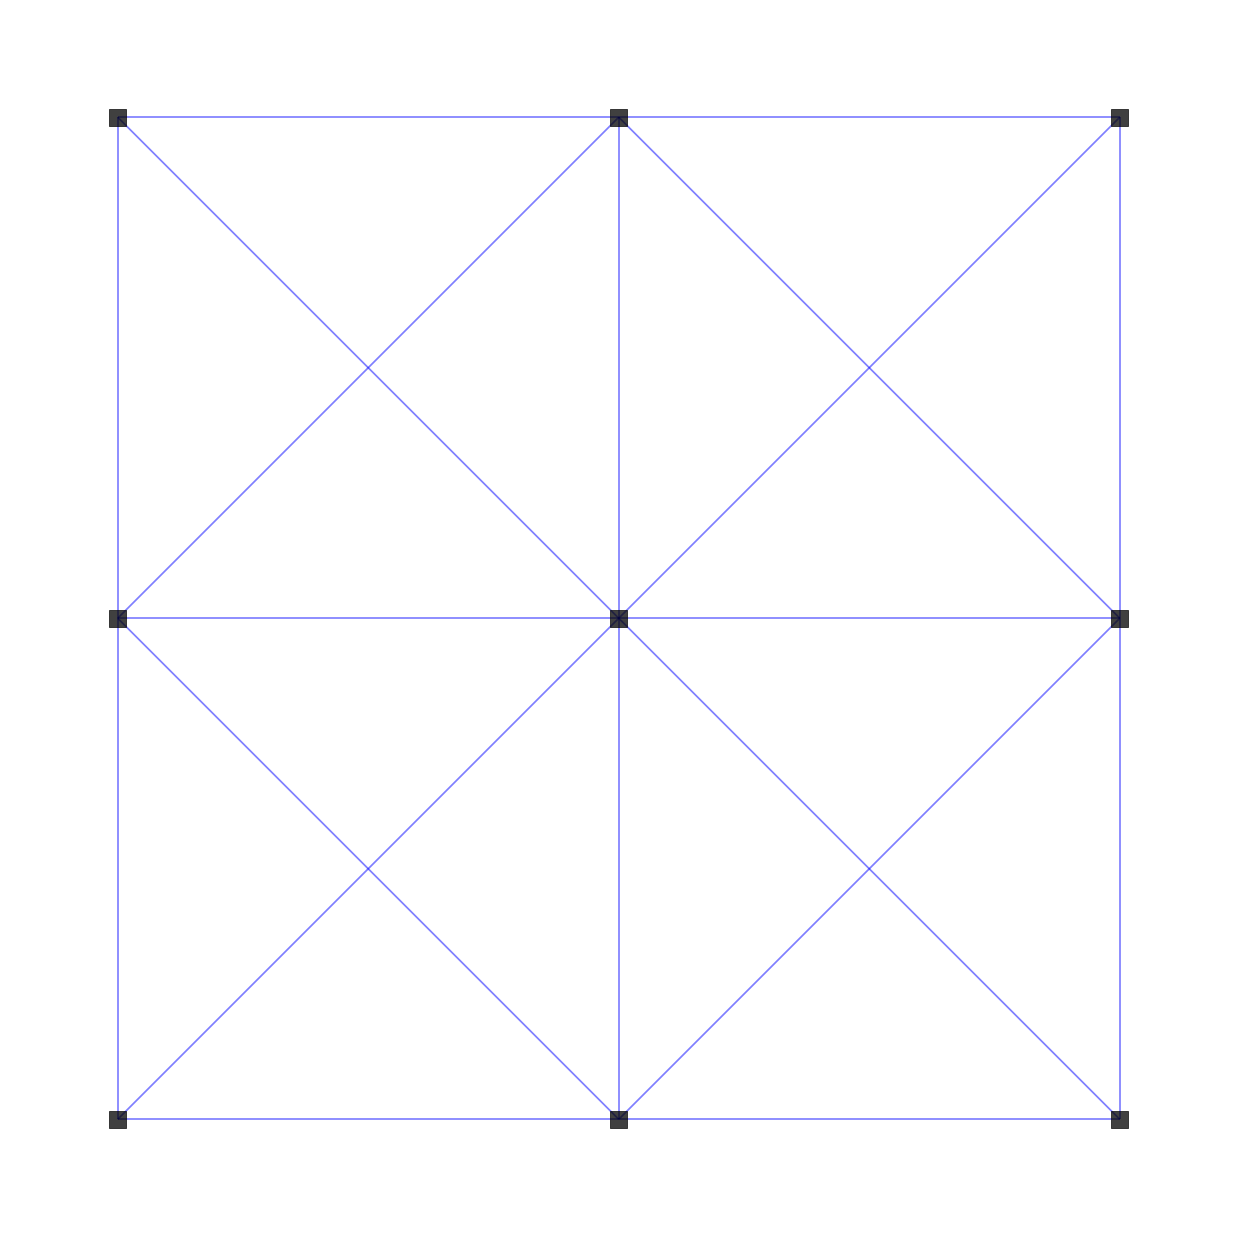

In [94]:
H = 3
W = 3

k = 16
arr = np.rot90(X_test[k,:,:], -1)[:H,:W]
# Create HxW grid graph
G = nx.grid_2d_graph(H, W)

# Set all weights to 1
for n, node in enumerate(G.nodes):
    G.nodes[node]['weight'] = arr.flatten()[n] /255
    # print( G.nodes[node]['weight'])
    
# Set all weights to 1
for e, edge in enumerate(G.edges):
    G.edges[edge]['weight'] = 0.5
    
G.add_edges_from([
    ((x, y), (x+1, y+1))
    for x in range(W-1)
    for y in range(H-1)
] + [
    ((x+1, y), (x, y+1))
    for x in range(W-1)
    for y in range(H-1)
], weight=0.5)

draw_grid(G)

In [96]:
data = torch_geometric.utils.from_networkx(G, 
    group_node_attrs=['weight'],
    group_edge_attrs=['weight'])

In [97]:
data

Data(edge_index=[2, 40], x=[9, 1], edge_attr=[40, 1])

In [93]:
max(data.x)

tensor([1.], dtype=torch.float64)